In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

In [3]:
train_df=pd.read_csv('train.csv')
train_df.head(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [4]:
test_df=pd.read_csv('test.csv')
test_df.head(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [8]:
print(train_df.isnull().sum())

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [9]:
train_df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [10]:
train_df.shape

(750000, 9)

In [11]:
train_df.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [12]:
train_df.duplicated().sum()

np.int64(0)

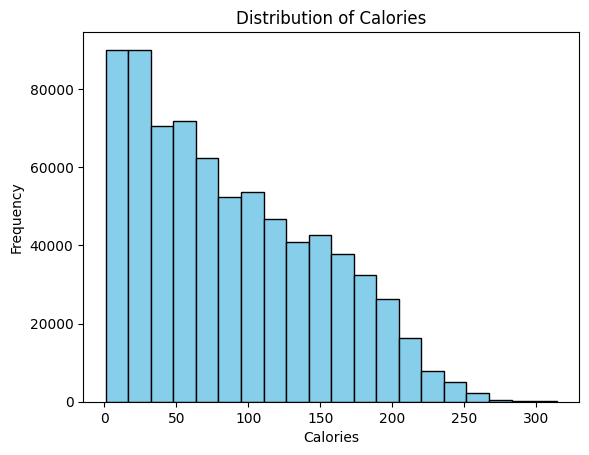

In [13]:
plt.hist(train_df['Calories'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

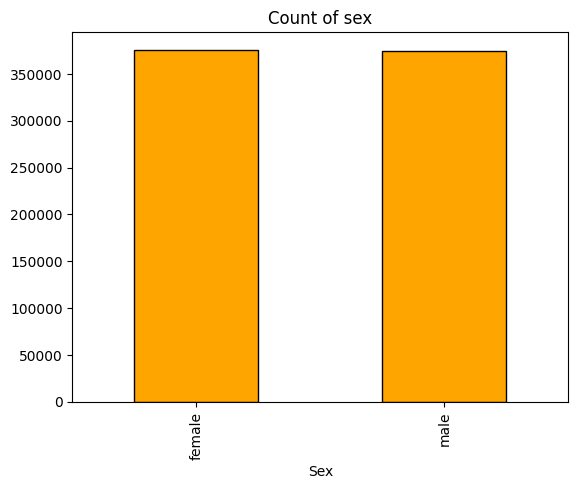

In [14]:
train_df['Sex'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Count of sex')
plt.show()

In [15]:
sex_counts=train_df['Sex'].value_counts()

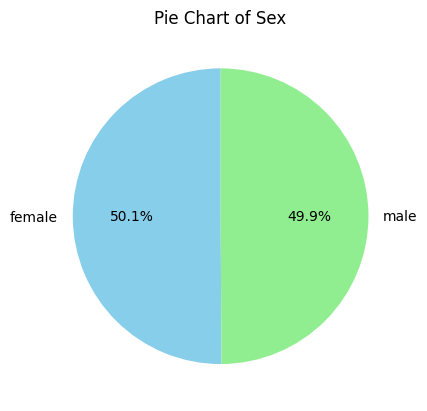

In [16]:
plt.pie(sex_counts,labels=sex_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
plt.title('Pie Chart of Sex')
plt.show()

In [17]:
corr = train_df['Weight'].corr(train_df['Calories'], method='pearson')
print("Correlation:", corr)

Correlation: 0.015863191832352557


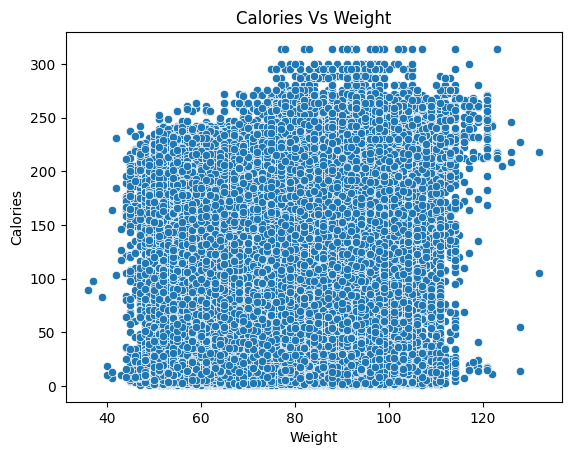

In [18]:
sns.scatterplot(x='Weight', y='Calories', data=train_df)
plt.title('Calories Vs Weight')
plt.show()

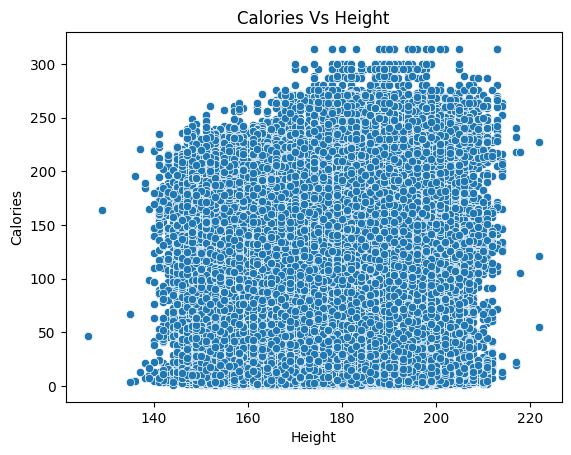

In [19]:
sns.scatterplot(x='Height', y='Calories', data=train_df)
plt.title('Calories Vs Height')
plt.show()

In [20]:
max_cal=train_df['Calories'].max()
print(max_cal)

314.0


In [21]:
min_cal=train_df['Calories'].min()
print(min_cal)

1.0


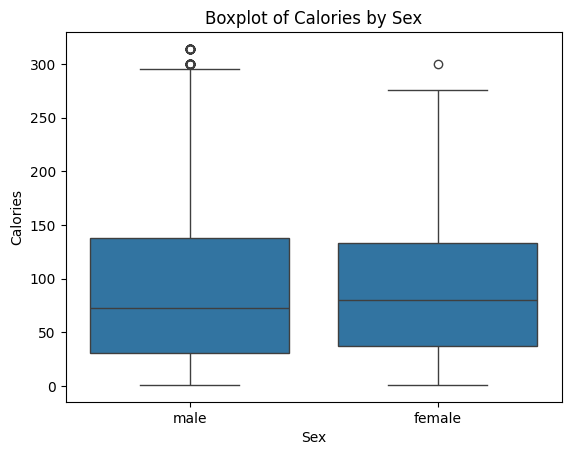

In [22]:
sns.boxplot(x='Sex', y='Calories', data=train_df)
plt.title('Boxplot of Calories by Sex')
plt.show()

In [23]:
top_10 = train_df.nlargest(10, 'Calories')
top_10

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
46431,46431,male,49,191.0,91.0,29.0,120.0,40.8,314.0
68802,68802,male,29,202.0,99.0,29.0,120.0,40.7,314.0
82351,82351,male,73,189.0,92.0,29.0,111.0,41.0,314.0
86484,86484,male,75,199.0,103.0,26.0,123.0,40.5,314.0
86596,86596,male,36,213.0,123.0,29.0,117.0,40.8,314.0
108644,108644,male,47,194.0,93.0,29.0,120.0,40.9,314.0
120117,120117,male,57,205.0,114.0,29.0,119.0,40.8,314.0
174139,174139,male,69,191.0,96.0,29.0,119.0,40.7,314.0
183884,183884,male,75,199.0,103.0,28.0,123.0,40.8,314.0
184638,184638,male,79,188.0,90.0,28.0,123.0,41.0,314.0


In [24]:
mean_cal=train_df['Calories'].mean()
print(np.round(mean_cal,2))

88.28


In [25]:
median_cal=train_df['Calories'].median()
print(median_cal)

77.0


In [26]:
mode_cal=train_df['Calories'].mode()[0]
print(mode_cal)

7.0


In [27]:
percent_above_avg=(train_df['Calories']>mean_cal).mean() *100
print(percent_above_avg)

44.4752


In [28]:
calories=train_df['Calories'].to_numpy()
weight=train_df['Weight'].to_numpy()
print(calories)
print(weight)

[150.  34.  29. ... 221. 109. 103.]
[82. 60. 64. ... 67. 91. 65.]


In [29]:
print(calories+weight)
print(calories-weight)

[232.  94.  93. ... 288. 200. 168.]
[ 68. -26. -35. ... 154.  18.  38.]


In [30]:
train_df['Sex_mapped'] = train_df['Sex'].str.strip().str.lower().map({'male':0,'female':1})
train_df.head(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Sex_mapped
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,1
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,1
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,1


In [31]:
train_df.drop('Sex', axis=1, inplace=True)
train_df.head(5)

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Sex_mapped
0,0,36,189.0,82.0,26.0,101.0,41.0,150.0,0
1,1,64,163.0,60.0,8.0,85.0,39.7,34.0,1
2,2,51,161.0,64.0,7.0,84.0,39.8,29.0,1
3,3,20,192.0,90.0,25.0,105.0,40.7,140.0,0
4,4,38,166.0,61.0,25.0,102.0,40.6,146.0,1


In [32]:
train_df['BMI'] = (train_df['Weight'] / ((train_df['Height']/100)**2)).round(2)
train_df.head(5)

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Sex_mapped,BMI
0,0,36,189.0,82.0,26.0,101.0,41.0,150.0,0,22.96
1,1,64,163.0,60.0,8.0,85.0,39.7,34.0,1,22.58
2,2,51,161.0,64.0,7.0,84.0,39.8,29.0,1,24.69
3,3,20,192.0,90.0,25.0,105.0,40.7,140.0,0,24.41
4,4,38,166.0,61.0,25.0,102.0,40.6,146.0,1,22.14


In [33]:
train_df['Duration_x_HeartRate'] = train_df['Duration'] * train_df['Heart_Rate']
train_df.head(5)

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Sex_mapped,BMI,Duration_x_HeartRate
0,0,36,189.0,82.0,26.0,101.0,41.0,150.0,0,22.96,2626.0
1,1,64,163.0,60.0,8.0,85.0,39.7,34.0,1,22.58,680.0
2,2,51,161.0,64.0,7.0,84.0,39.8,29.0,1,24.69,588.0
3,3,20,192.0,90.0,25.0,105.0,40.7,140.0,0,24.41,2625.0
4,4,38,166.0,61.0,25.0,102.0,40.6,146.0,1,22.14,2550.0


In [34]:
train_df.shape

(750000, 11)